In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.tokenize import word_tokenize
import re

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **New Code for sentiment analysis**

In [5]:
!pip uninstall torch

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.5.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.5.1+cu121


In [6]:
!pip install torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 982.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install --upgrade torch transformers nltk seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average Sentiment Score: 0.46222647314979914


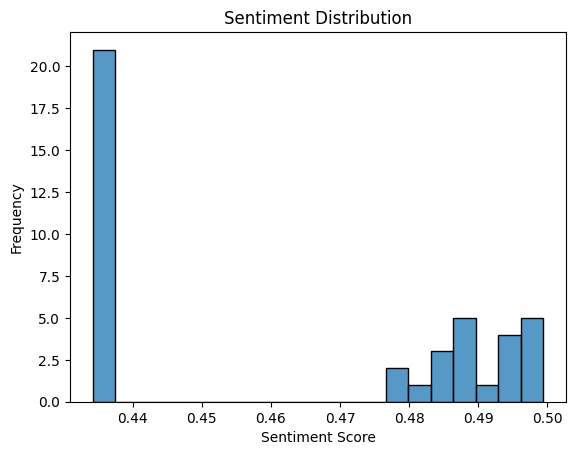

In [9]:
import torch
import torch.nn.functional as F
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.util import bigrams
from collections import Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the preprocessed Sanskrit text file
with open('/content/drive/MyDrive/Valmiki Ramayana/Sanskrit/Yuddhakanda/Pre-processed_chapter 37.txt', 'r', encoding='utf-8') as file:
    text = file.readlines()

# Model name for mBERT
model_name = "bert-base-multilingual-uncased"

# Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Assuming binary classification

# Function to analyze sentiment of each sentence
def analyze_sentiment(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = F.softmax(logits, dim=-1)
    positive_score = probs[0][1].item()  # Probability of positive sentiment
    return positive_score

# Analyze the sentiment of each sentence and store in a list
sentiments = []
for line in text:
    sentiment = analyze_sentiment(line.strip())
    sentiments.append((line.strip(), sentiment))

# Calculate the average sentiment score
average_sentiment = sum(sentiment for _, sentiment in sentiments) / len(sentiments)
print("Average Sentiment Score:", average_sentiment)

# Store all line sentiments in one file
with open('/content/drive/MyDrive/Valmiki Ramayana/Sanskrit/Yuddhakanda/Sentiment_chapter 37.txt', 'w', encoding='utf-8') as file:
    for line, sentiment in sentiments:
        file.write(f"{line}\t{sentiment}\n")

# Generate a heatmap of the sentiment distribution
sentiment_scores = [sentiment for _, sentiment in sentiments]
sns.histplot(sentiment_scores, bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

# Extract bigrams from the text
#tokens = nltk.word_tokenize(' '.join(line for line, _ in sentiments))
#bi_grams = list(bigrams(tokens))
#bi_gram_counts = Counter(bi_grams)
#print(bi_gram_counts.most_common(10))  # Print the top 10 most common bigrams
